In [47]:
import pandas as pd
data = pd.read_csv('/content/cybersecurity_intrusion_data.csv')

print("Shape of the dataset:", data.shape)
data.head()


Shape of the dataset: (9537, 11)


,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


In [48]:
# Check data types and non-null values
data.info()

# Summary statistics for numeric columns
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB


,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,attack_detected
count,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000
mean,500.430639,4.032086,792.745312,0.331338,1.517773,0.149942,0.447101
std,198.379364,1.963012,786.560144,0.177175,1.033988,0.357034,0.497220
min,64.000000,1.000000,0.500000,0.002497,0.000000,0.000000,0.000000
25%,365.000000,3.000000,231.953006,0.191946,1.000000,0.000000,0.000000
50%,499.000000,4.000000,556.277457,0.314778,1.000000,0.000000,0.000000
75%,635.000000,5.000000,1105.380602,0.453388,2.000000,0.000000,1.000000
max,1285.000000,13.000000,7190.392213,0.924299,5.000000,1.000000,1.000000


In [49]:
# Total missing values per column
missing = data.isnull().sum()
missing[missing > 0]


,0
encryption_used,1966


In [50]:
duplicates = data.duplicated().sum()
print("Number of duplicate rows:", duplicates)

data = data.drop_duplicates()


Number of duplicate rows: 0


In [51]:
# Separate columns by datatype
categorical_cols = data.select_dtypes(include='object').columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Columns:", list(categorical_cols))
print("Numerical Columns:", list(numerical_cols))


Categorical Columns: ['session_id', 'protocol_type', 'encryption_used', 'browser_type']
Numerical Columns: ['network_packet_size', 'login_attempts', 'session_duration', 'ip_reputation_score', 'failed_logins', 'unusual_time_access', 'attack_detected']


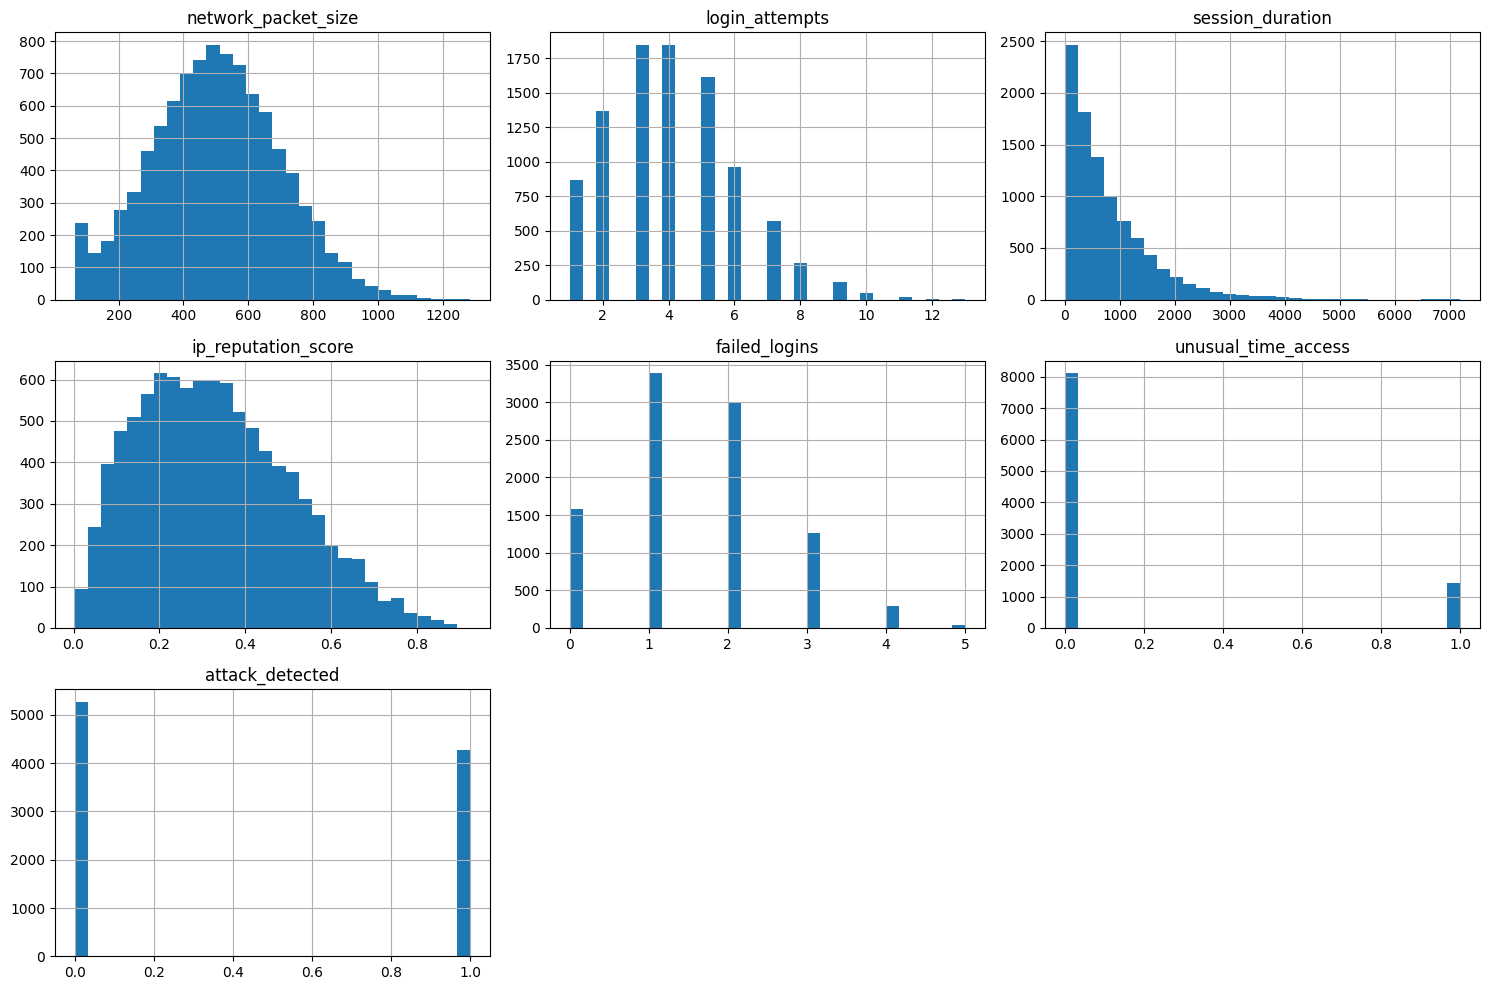

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numeric columns
data[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


In [53]:
# Value counts for categorical variables
for col in categorical_cols:
    print(f"Value counts for {col}:")
    print(data[col].value_counts())
    print("="*50)


Value counts for session_id:
session_id
SID_09537    1
SID_09521    1
SID_09520    1
SID_09519    1
SID_09518    1
            ..
SID_00006    1
SID_00005    1
SID_00004    1
SID_00003    1
SID_00002    1
Name: count, Length: 9537, dtype: int64
Value counts for protocol_type:
protocol_type
TCP     6624
UDP     2406
ICMP     507
Name: count, dtype: int64
Value counts for encryption_used:
encryption_used
AES    4706
DES    2865
Name: count, dtype: int64
Value counts for browser_type:
browser_type
Chrome     5137
Firefox    1944
Edge       1469
Unknown     502
Safari      485
Name: count, dtype: int64


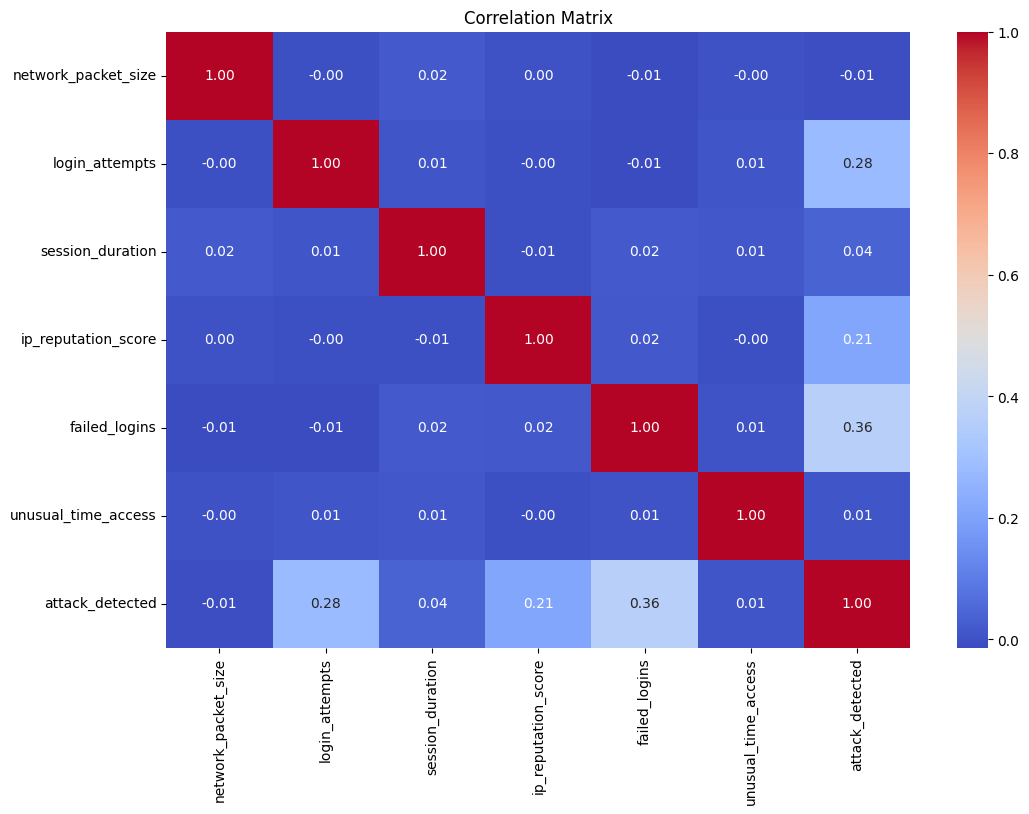

In [54]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [55]:
# Check class distribution
if 'label' in data.columns:
    sns.countplot(x='label', data=data)
    plt.title("Class Distribution")
    plt.xticks(rotation=45)
    plt.show()


In [56]:
# Structure and types
data.info()

# Missing values
missing = data.isnull().sum()
print("Missing values:\n", missing[missing > 0])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB
Missing values:
 encryption_used    1966
dtype: int64


In [57]:
# Drop session_id if it's just an identifier
data = data.drop(columns=['session_id'])


In [58]:
# After dropping session_id, redefine categorical columns
categorical_cols = ['protocol_type', 'encryption_used', 'browser_type']


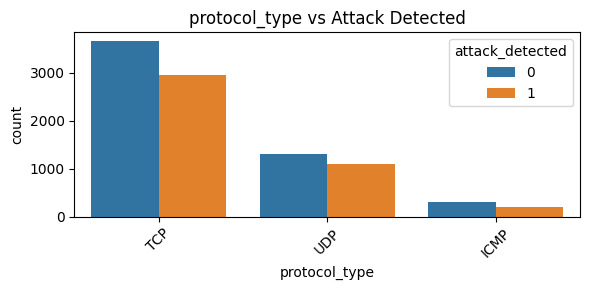

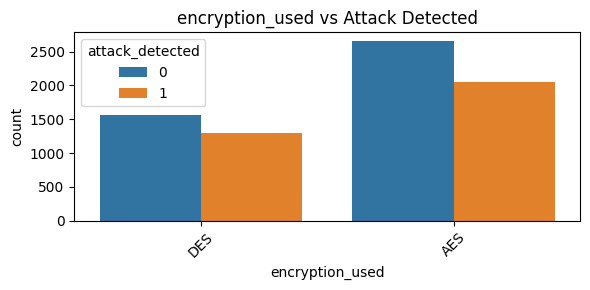

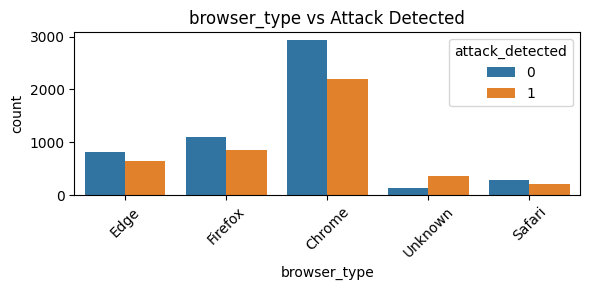

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution for each categorical feature against target
for col in categorical_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=data, x=col, hue='attack_detected')
    plt.title(f"{col} vs Attack Detected")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [60]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
label_enc_cols = ['protocol_type', 'encryption_used', 'browser_type']
label_encoders = {}

for col in label_enc_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


In [61]:
# Features and target
X = data.drop('attack_detected', axis=1)
y = data['attack_detected']


In [62]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [63]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the classifier
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [64]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on test set
y_pred = dt_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8841719077568134

Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91      1055
           1       1.00      0.74      0.85       853

    accuracy                           0.88      1908
   macro avg       0.91      0.87      0.88      1908
weighted avg       0.90      0.88      0.88      1908

Confusion Matrix:
 [[1055    0]
 [ 221  632]]


In [65]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on test set
y_pred = dt_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8841719077568134

Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91      1055
           1       1.00      0.74      0.85       853

    accuracy                           0.88      1908
   macro avg       0.91      0.87      0.88      1908
weighted avg       0.90      0.88      0.88      1908

Confusion Matrix:
 [[1055    0]
 [ 221  632]]


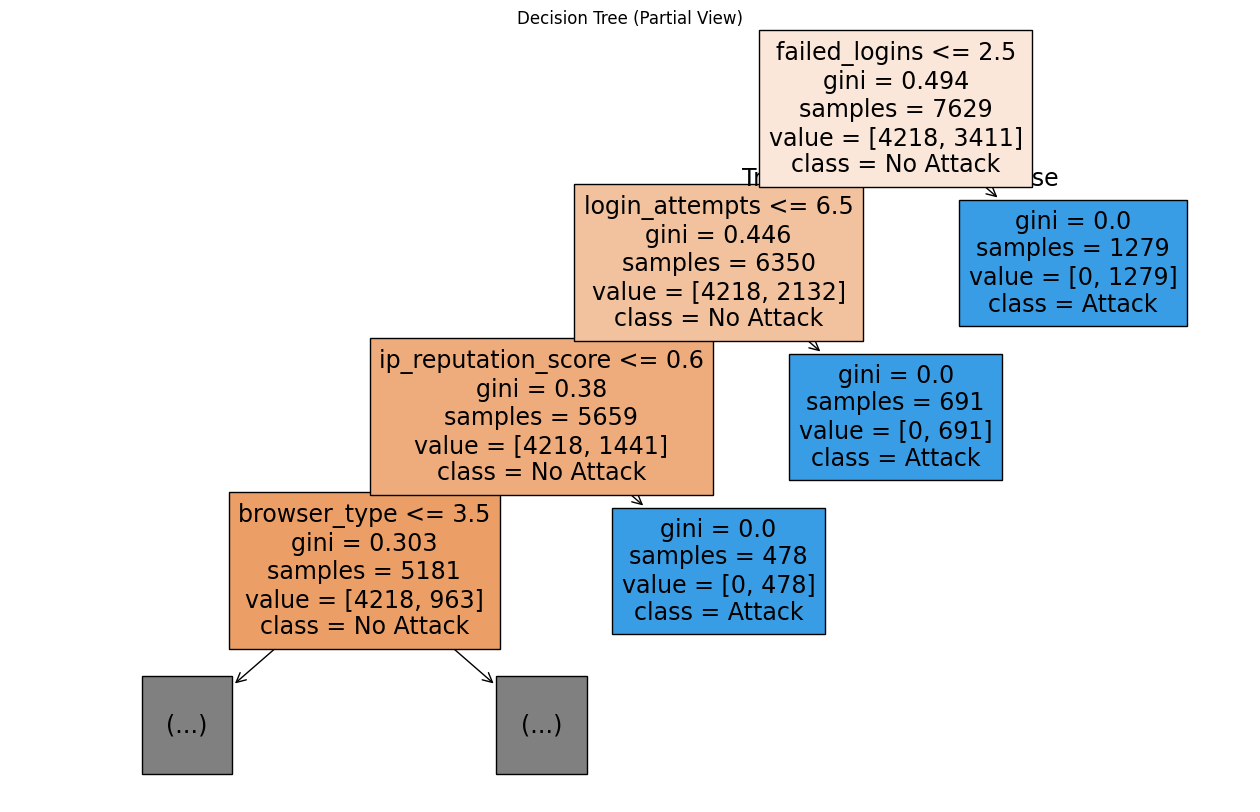

In [66]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['No Attack', 'Attack'], filled=True, max_depth=3)
plt.title("Decision Tree (Partial View)")
plt.show()


In [67]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize base model
dt = DecisionTreeClassifier(random_state=42)

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

# Best parameters and best estimator
print("Best Parameters:", grid_search.best_params_)
best_dt = grid_search.best_estimator_


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}


In [68]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Predict on test set using best model
y_pred_best = best_dt.predict(X_test)

print("Best Decision Tree Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


Best Decision Tree Accuracy: 0.8841719077568134

Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91      1055
           1       1.00      0.74      0.85       853

    accuracy                           0.88      1908
   macro avg       0.91      0.87      0.88      1908
weighted avg       0.90      0.88      0.88      1908

Confusion Matrix:
 [[1055    0]
 [ 221  632]]


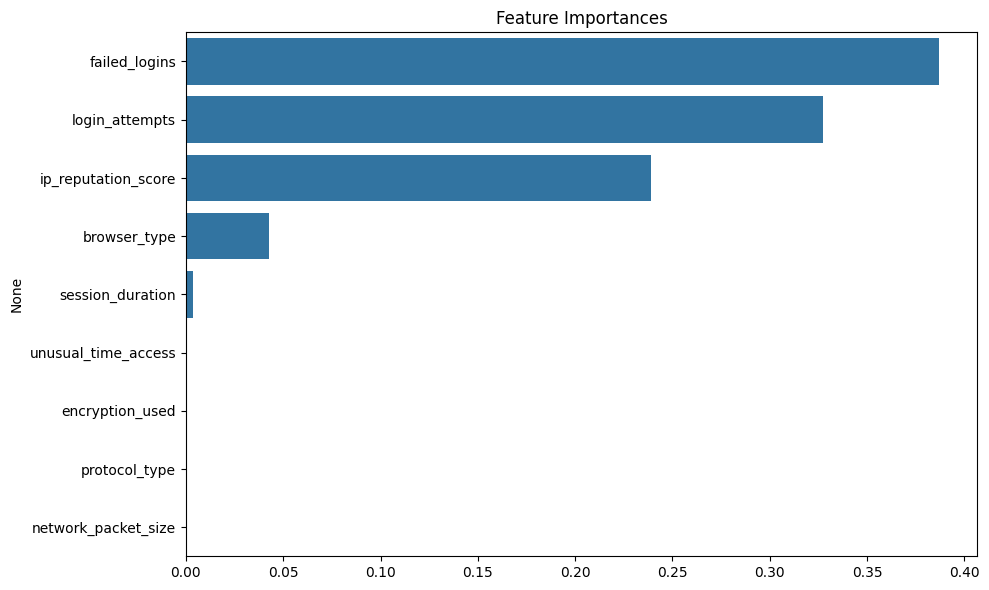

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = best_dt.feature_importances_
feature_names = X.columns

# Sort by importance
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.tight_layout()
plt.show()


In [70]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Base estimator
base_dt = DecisionTreeClassifier(random_state=42)

# AdaBoost classifier with correct parameter
ada = AdaBoostClassifier(estimator=base_dt, random_state=42)

# Grid search parameter grid (note: use estimator__ instead of base_estimator__)
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.5, 1.0, 1.5],
    'estimator__max_depth': [1, 3, 5],
    'estimator__min_samples_split': [2, 5]
}

# GridSearchCV
grid_search = GridSearchCV(estimator=ada, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

# Final best model
best_ada = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'estimator__max_depth': 5, 'estimator__min_samples_split': 2, 'learning_rate': 1.0, 'n_estimators': 50}


In [71]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Predictions
y_pred_dt = best_dt.predict(X_test)
y_pred_ada = best_ada.predict(X_test)

# Probabilities for ROC
y_proba_dt = best_dt.predict_proba(X_test)[:, 1]
y_proba_ada = best_ada.predict_proba(X_test)[:, 1]

# Metrics
print("📌 Decision Tree Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("ROC AUC:", roc_auc_score(y_test, y_proba_dt))
print(classification_report(y_test, y_pred_dt))

print("\n📌 AdaBoost Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_ada))
print("ROC AUC:", roc_auc_score(y_test, y_proba_ada))
print(classification_report(y_test, y_pred_ada))


📌 Decision Tree Performance
Accuracy: 0.8841719077568134
ROC AUC: 0.8719345715984288
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1055
           1       1.00      0.74      0.85       853

    accuracy                           0.88      1908
   macro avg       0.91      0.87      0.88      1908
weighted avg       0.90      0.88      0.88      1908


📌 AdaBoost Performance
Accuracy: 0.8857442348008385
ROC AUC: 0.8728902174094221
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1055
           1       1.00      0.75      0.85       853

    accuracy                           0.89      1908
   macro avg       0.91      0.87      0.88      1908
weighted avg       0.90      0.89      0.88      1908



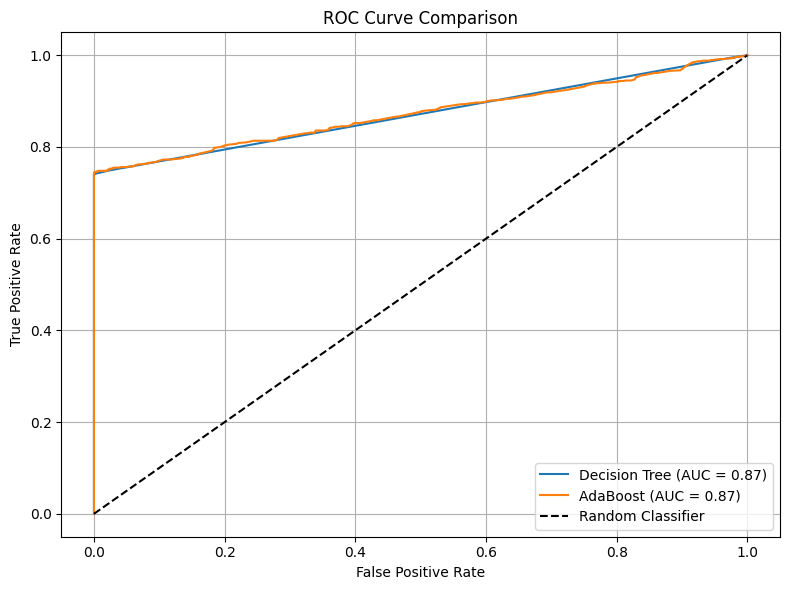

In [72]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ROC curves
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
fpr_ada, tpr_ada, _ = roc_curve(y_test, y_proba_ada)

# AUC
auc_dt = auc(fpr_dt, tpr_dt)
auc_ada = auc(fpr_ada, tpr_ada)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_ada, tpr_ada, label=f'AdaBoost (AUC = {auc_ada:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()


In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Build pipeline (scaling + model)
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))
])

# Fit the model
logreg_pipeline.fit(X_train, y_train)

# Predict
y_pred_logreg = logreg_pipeline.predict(X_test)
y_proba_logreg = logreg_pipeline.predict_proba(X_test)[:, 1]


In [74]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

print("📌 Logistic Regression Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("ROC AUC:", roc_auc_score(y_test, y_proba_logreg))
print(classification_report(y_test, y_pred_logreg))


📌 Logistic Regression Performance
Accuracy: 0.7285115303983228
ROC AUC: 0.7799625520188017
              precision    recall  f1-score   support

           0       0.74      0.79      0.76      1055
           1       0.71      0.66      0.68       853

    accuracy                           0.73      1908
   macro avg       0.73      0.72      0.72      1908
weighted avg       0.73      0.73      0.73      1908



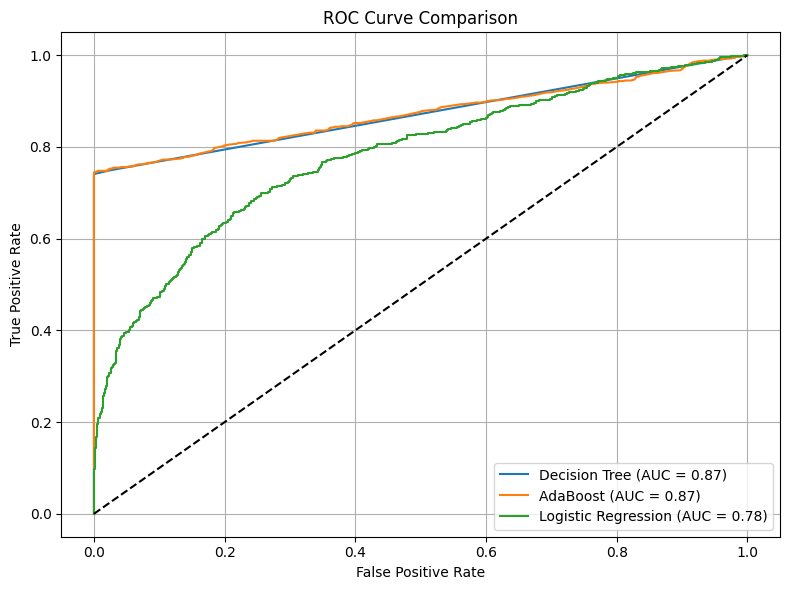

In [75]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ROC curve for Logistic Regression
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_proba_logreg)
auc_logreg = auc(fpr_logreg, tpr_logreg)

# Plot all
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_ada, tpr_ada, label=f'AdaBoost (AUC = {auc_ada:.2f})')
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})')
plt.plot([0, 1], [0, 1], 'k--')

plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()


In [76]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from sklearn.compose import make_column_selector as selector

# Identify column types
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
])

# Pipeline
baseline_lr = Pipeline([
    ('preprocess', preprocessor),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

baseline_lr.fit(X_train, y_train)
y_pred_base = baseline_lr.predict(X_test)
y_proba_base = baseline_lr.predict_proba(X_test)[:, 1]


In [77]:
def evaluate_model(name, y_true, y_pred, y_proba):
    acc = accuracy_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_proba)
    print(f"\n📌 {name}")
    print("Accuracy:", acc)
    print("ROC AUC:", auc)
    print(classification_report(y_true, y_pred))
    return {"model": name, "accuracy": acc, "roc_auc": auc}


In [78]:
results = []
results.append(evaluate_model("Baseline LR", y_test, y_pred_base, y_proba_base))



📌 Baseline LR
Accuracy: 0.7285115303983228
ROC AUC: 0.7799625520188017
              precision    recall  f1-score   support

           0       0.74      0.79      0.76      1055
           1       0.71      0.66      0.68       853

    accuracy                           0.73      1908
   macro avg       0.73      0.72      0.72      1908
weighted avg       0.73      0.73      0.73      1908



In [79]:
balanced_lr = Pipeline([
    ('preprocess', preprocessor),
    ('clf', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
])

balanced_lr.fit(X_train, y_train)
y_pred_bal = balanced_lr.predict(X_test)
y_proba_bal = balanced_lr.predict_proba(X_test)[:, 1]

results.append(evaluate_model("LR + Balanced Class Weight", y_test, y_pred_bal, y_proba_bal))



📌 LR + Balanced Class Weight
Accuracy: 0.7169811320754716
ROC AUC: 0.7801570148291783
              precision    recall  f1-score   support

           0       0.75      0.72      0.74      1055
           1       0.67      0.71      0.69       853

    accuracy                           0.72      1908
   macro avg       0.71      0.72      0.71      1908
weighted avg       0.72      0.72      0.72      1908



In [80]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

smote_lr = ImbPipeline([
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

smote_lr.fit(X_train, y_train)
y_pred_smote = smote_lr.predict(X_test)
y_proba_smote = smote_lr.predict_proba(X_test)[:, 1]

results.append(evaluate_model("LR + SMOTE", y_test, y_pred_smote, y_proba_smote))



📌 LR + SMOTE
Accuracy: 0.7175052410901468
ROC AUC: 0.7803170299417167
              precision    recall  f1-score   support

           0       0.75      0.73      0.74      1055
           1       0.68      0.71      0.69       853

    accuracy                           0.72      1908
   macro avg       0.71      0.72      0.72      1908
weighted avg       0.72      0.72      0.72      1908



In [81]:
from sklearn.model_selection import GridSearchCV

grid_lr = Pipeline([
    ('preprocess', preprocessor),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

param_grid = {
    'clf__C': [0.001, 0.01, 0.1, 1, 10],
    'clf__penalty': ['l2'],
    'clf__solver': ['lbfgs']
}

grid_search = GridSearchCV(grid_lr, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_lr = grid_search.best_estimator_
y_pred_grid = best_lr.predict(X_test)
y_proba_grid = best_lr.predict_proba(X_test)[:, 1]

results.append(evaluate_model("Tuned LR (GridSearch)", y_test, y_pred_grid, y_proba_grid))



📌 Tuned LR (GridSearch)
Accuracy: 0.7285115303983228
ROC AUC: 0.7799603295866833
              precision    recall  f1-score   support

           0       0.74      0.79      0.76      1055
           1       0.71      0.66      0.68       853

    accuracy                           0.73      1908
   macro avg       0.73      0.72      0.72      1908
weighted avg       0.73      0.73      0.73      1908



In [82]:
from sklearn.preprocessing import PolynomialFeatures

poly_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

poly_pipeline.fit(X_train, y_train)
y_pred_poly = poly_pipeline.predict(X_test)
y_proba_poly = poly_pipeline.predict_proba(X_test)[:, 1]

results.append(evaluate_model("LR + Polynomial Features", y_test, y_pred_poly, y_proba_poly))



📌 LR + Polynomial Features
Accuracy: 0.7583857442348009
ROC AUC: 0.823975597695338
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1055
           1       0.72      0.74      0.73       853

    accuracy                           0.76      1908
   macro avg       0.76      0.76      0.76      1908
weighted avg       0.76      0.76      0.76      1908



In [83]:
import pandas as pd

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="roc_auc", ascending=False)
print("\n📊 Model Performance Comparison:")
display(results_df)



📊 Model Performance Comparison:


,model,accuracy,roc_auc
4,LR + Polynomial Features,0.758386,0.823976
2,LR + SMOTE,0.717505,0.780317
1,LR + Balanced Class Weight,0.716981,0.780157
0,Baseline LR,0.728512,0.779963
3,Tuned LR (GridSearch),0.728512,0.779960


In [84]:
from sklearn.preprocessing import PolynomialFeatures
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import pandas as pd

# Split original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Generate polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Apply SMOTE on polynomial feature set
smote = SMOTE(random_state=42)
X_train_poly_sm, y_train_sm = smote.fit_resample(X_train_poly, y_train)

# Train logistic regression
lr_poly_smote = LogisticRegression(max_iter=1000, random_state=42)
lr_poly_smote.fit(X_train_poly_sm, y_train_sm)

# Predictions
y_pred = lr_poly_smote.predict(X_test_poly)
y_proba = lr_poly_smote.predict_proba(X_test_poly)[:, 1]

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
report = classification_report(y_test, y_pred)

# Print results
print("📌 Logistic Regression + Poly Features + SMOTE Performance")
print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)
print(report)


📌 Logistic Regression + Poly Features + SMOTE Performance
Accuracy: 0.7033542976939203
ROC AUC: 0.76301761833062
              precision    recall  f1-score   support

           0       0.74      0.71      0.73      1055
           1       0.66      0.69      0.68       853

    accuracy                           0.70      1908
   macro avg       0.70      0.70      0.70      1908
weighted avg       0.71      0.70      0.70      1908



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Evaluate
print("📌 Random Forest Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_proba_rf))
print(classification_report(y_test, y_pred_rf))


📌 Random Forest Performance
Accuracy: 0.8836477987421384
ROC AUC: 0.873290255190768
              precision    recall  f1-score   support

           0       0.83      1.00      0.90      1055
           1       0.99      0.75      0.85       853

    accuracy                           0.88      1908
   macro avg       0.91      0.87      0.88      1908
weighted avg       0.90      0.88      0.88      1908



In [86]:
from xgboost import XGBClassifier

# Train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

# Evaluate
print("📌 XGBoost Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_proba_xgb))
print(classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:16:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📌 XGBoost Performance
Accuracy: 0.8794549266247379
ROC AUC: 0.8757938249723586
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1055
           1       0.97      0.75      0.85       853

    accuracy                           0.88      1908
   macro avg       0.90      0.87      0.87      1908
weighted avg       0.89      0.88      0.88      1908



In [87]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1. Read the CSV
data = pd.read_csv('/content/cybersecurity_intrusion_data.csv')

# 2. Remove the session_id column
data.drop(columns=['session_id'], inplace=True)

# 3. Label encode categorical features
categorical_cols = ['protocol_type', 'encryption_used', 'browser_type']
for col in categorical_cols:
    # You can also use: data[col] = data[col].astype('category').cat.codes
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))

# 4. Separate features (X) and labels (y)
feature_names = [col for col in data.columns if col != 'attack_detected']
X = data[feature_names].values
y = data['attack_detected'].values

# 5. Split data and train a simple decision tree
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print("Decision Tree Accuracy: {:.4f}".format(accuracy))


Decision Tree Accuracy: 0.8920


In [88]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# 1. Extract rules from a Decision Tree
#    - If no conditions exist (root is a leaf), store "True"

def extract_rules(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != -2 else "leaf" for i in tree_.feature
    ]
    rules = []

    def recurse(node, rule_parts):
        if tree_.feature[node] != -2:  # Not a leaf
            name = feature_name[node]
            threshold = tree_.threshold[node]
            left_rule = f"{name} <= {threshold:.2f}"
            right_rule = f"{name} > {threshold:.2f}"
            recurse(tree_.children_left[node], rule_parts + [left_rule])
            recurse(tree_.children_right[node], rule_parts + [right_rule])
        else:  # Leaf node
            class_pred = tree_.value[node].argmax()
            # If no conditions, treat as "True" rule
            rule_str = " and ".join(rule_parts) if rule_parts else "True"
            rules.append((rule_str, class_pred))

    recurse(0, [])
    return rules


# 2. Helper function to parse rule conditions
#    - Return (None, None, None) if condition is "True"

def parse_condition(condition):
    condition = condition.strip()
    # Handle unconditional rule
    if condition == "True":
        return None, None, None

    for op in ["<=", ">"]:
        if op in condition:
            feature, value = condition.split(op)
            return feature.strip(), op, value.strip()

    raise ValueError("Invalid condition format")


# 3. Modified IREP Implementation (selects the best pruned rule)
def irep_algorithm(X, y, feature_names, max_rules=10):
    # Split data into train (80%) and test (20%)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    # Further split train into grow/prune (67% / 33% of train)
    X_grow, X_prune, y_grow, y_prune = train_test_split(
        X_train, y_train, test_size=0.33, random_state=42
    )

    remaining_examples = X_grow.copy()
    remaining_labels = y_grow.copy()
    final_rules = []

    print("Starting IREP Algorithm...\n")

    while len(final_rules) < max_rules and len(remaining_examples) > 0:
        # Train a small decision tree
        tree = DecisionTreeClassifier(max_depth=3, random_state=42)
        tree.fit(remaining_examples, remaining_labels)

        # Extract candidate rules from the tree
        growing_rules = extract_rules(tree, feature_names)
        print("Growing Phase - Rules before pruning:")
        for rule, pred in growing_rules:
            print(f"  Rule: {rule} => Class {pred}")

        # -------------------------------------------
        # Pruning Phase
        # -------------------------------------------
        X_prune_df = pd.DataFrame(X_prune, columns=feature_names)
        # We'll collect all candidate pruned rules, then pick the best
        pruned_rules_candidates = []

        for rule, pred in growing_rules:
            conditions = rule.split(" and ")
            # Start with a mask covering all prune examples
            mask = np.ones(len(X_prune), dtype=bool)

            for cond in conditions:
                feature, operator, value = parse_condition(cond)
                # If feature is None => "True" rule => covers all examples
                if feature is None:
                    continue
                if operator == "<=":
                    mask &= X_prune_df[feature] <= float(value)
                else:  # operator == ">"
                    mask &= X_prune_df[feature] > float(value)

            coverage = mask.sum()
            if coverage > 0:
                y_prune_covered = y_prune[mask]
                # Error if we keep the rule
                error_unpruned = 1 - accuracy_score(y_prune_covered, [pred] * coverage)
                # Error if we prune the rule (replace with majority class)
                majority_class = pd.Series(y_prune).mode()[0]
                error_pruned = 1 - accuracy_score(y_prune_covered, [majority_class] * coverage)

                # Keep this rule if not worse than pruning
                if error_unpruned <= error_pruned:
                    pruned_rules_candidates.append((rule, pred, error_unpruned, coverage))

        # Sort pruned rules by their error_unpruned (ascending)
        pruned_rules_candidates.sort(key=lambda x: x[2])

        print("\nPruning Phase - Rules after pruning:")
        for (r_rule, r_pred, r_err, r_cov) in pruned_rules_candidates:
            print(f"  Rule: {r_rule} => Class {r_pred}, error={r_err:.4f}, coverage={r_cov}")

        # Pick the best rule from the pruned candidates (lowest error)
        if pruned_rules_candidates:
            best_rule, best_pred, best_error, best_cov = pruned_rules_candidates[0]
            final_rules.append((best_rule, best_pred))

            # Remove covered examples from the remaining_examples
            X_grow_df = pd.DataFrame(remaining_examples, columns=feature_names)
            mask = np.ones(len(X_grow_df), dtype=bool)

            for cond in best_rule.split(" and "):
                feature, operator, value = parse_condition(cond)
                # "True" rule => covers everything
                if feature is None:
                    continue
                if operator == "<=":
                    mask &= X_grow_df[feature] <= float(value)
                else:  # operator == ">"
                    mask &= X_grow_df[feature] > float(value)

            remaining_examples = remaining_examples[~mask]
            remaining_labels = remaining_labels[~mask]

        if not pruned_rules_candidates:
            # No valid pruned rule => stop
            break

    # -------------------------------------------
    # Evaluate on test set
    # -------------------------------------------
    X_test_df = pd.DataFrame(X_test, columns=feature_names)
    predictions = np.zeros(len(X_test), dtype=int)

    for i, row_data in X_test_df.iterrows():
        # Default prediction (if no rule matches) can be 0 or majority
        predictions[i] = 0

        for rule, pred in final_rules:
            conditions = rule.split(" and ")
            satisfies_rule = True
            for cond in conditions:
                feature, operator, value = parse_condition(cond)
                # If feature is None => "True" => covers all
                if feature is None:
                    continue
                if operator == "<=":
                    if row_data[feature] > float(value):
                        satisfies_rule = False
                        break
                else:  # operator == ">"
                    if row_data[feature] <= float(value):
                        satisfies_rule = False
                        break
            if satisfies_rule:
                predictions[i] = pred
                break

    accuracy = accuracy_score(y_test, predictions)
    return final_rules, accuracy

# =====================================
#           MAIN SCRIPT
# =====================================
if __name__ == "__main__":
    # Load your full dataset
    # (Change the path/filename to match your real dataset)
    data = pd.read_csv('/content/cybersecurity_intrusion_data.csv')

    # 1. Drop Irrelevant Columns
    data.drop(columns=['session_id'], inplace=True)

    # 2. Encode Categorical Columns (if they exist)
    categorical_cols = ['protocol_type', 'encryption_used', 'browser_type']
    for col in categorical_cols:
        if col in data.columns:
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col].astype(str))

    # 3. Define feature names & separate features/labels
    feature_names = [
        'network_packet_size',
        'protocol_type',
        'login_attempts',
        'session_duration',
        'encryption_used',
        'ip_reputation_score',
        'failed_logins',
        'browser_type',
        'unusual_time_access'
    ]
    X = data[feature_names].values
    y = data['attack_detected'].values

    # 4. Run IREP algorithm
    final_rules, final_accuracy = irep_algorithm(X, y, feature_names, max_rules=10)

    # 5. Print the final ruleset and accuracy
    print("\nFinal Ruleset:")
    for rule, pred in final_rules:
        print(f"  Rule: {rule} => Class {pred}")

    print(f"\nFinal Accuracy on Test Set: {final_accuracy:.4f}")


Starting IREP Algorithm...

Growing Phase - Rules before pruning:
  Rule: failed_logins <= 2.50 and login_attempts <= 6.50 and ip_reputation_score <= 0.60 => Class 0
  Rule: failed_logins <= 2.50 and login_attempts <= 6.50 and ip_reputation_score > 0.60 => Class 1
  Rule: failed_logins <= 2.50 and login_attempts > 6.50 => Class 1
  Rule: failed_logins > 2.50 => Class 1

Pruning Phase - Rules after pruning:
  Rule: failed_logins <= 2.50 and login_attempts <= 6.50 and ip_reputation_score > 0.60 => Class 1, error=0.0000, coverage=177
  Rule: failed_logins <= 2.50 and login_attempts > 6.50 => Class 1, error=0.0000, coverage=221
  Rule: failed_logins > 2.50 => Class 1, error=0.0000, coverage=401
  Rule: failed_logins <= 2.50 and login_attempts <= 6.50 and ip_reputation_score <= 0.60 => Class 0, error=0.1891, coverage=1719
Growing Phase - Rules before pruning:
  Rule: failed_logins <= 2.50 and login_attempts <= 6.50 and browser_type <= 3.50 => Class 0
  Rule: failed_logins <= 2.50 and login_